<a href="https://www.kaggle.com/code/adielkilonzi/tutorial-credit-card-targeting-analysis?scriptVersionId=111388075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Find out what factors tend to predict a lead

## Knowing our data

This data has already been split to train and test data, but we will use the train set for both training and testing in this example. First step we need to understand our data. What does our data consist of? What are the fields? What do the values represent? Are there any blank fields? Is the data clean?

To display all the columns we can start by setting maximum display columns to 20 by using 'pd.set_option("display.max_columns", 20)'

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #ploting graphs
%matplotlib inline
import seaborn as sns #plotting better looking graphs
pd.set_option("display.max_columns", 20) #so we can display all columns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-buyers/test data credit card.csv
/kaggle/input/credit-card-buyers/train data credit card.csv


In [2]:
#read our training data
df_train = pd.read_csv("/kaggle/input/credit-card-buyers/train data credit card.csv")
df_train.head(10)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


## Learning about our data what are the variables data types and what do they represent.

From  this small output we have a feel of what our data is and what it represents. When doing analysis or performing machine learning it is important to understand your data. Know the data types. Sometimes you have someone who knows more about the data, they understands the fields it is best to gain as much as you can from this people. For this Dataset there is info on the dataset from the provider that is also useful. For now this is what it looks like.

ID - Unique identifier.

Gender - Binary data, (Bare in mind we are looking at a very small percent so our conclusion may be wrong)

Age - Integer, refers to age in years as per dataset documentation.

Region Code - Nominal data, code of the region for the customer we have limited information on this however since it is formatted in a way the bank understands.

Occupation - Nominal data, It tells us in a broad way what the person does for a living.

Channel Code - Nominal data, It tells us how the customer was acquired.

Vintage - Integer, it tells us when the customer last accessed credit facility from the bank in months.

Credit_product - Binary, tells us if the customer has any credit product actively. We can already see an 'NaN' telling us that there are blanks in this field we will need to look deeper on this.

Avg_Account_Balance - Integer, Tells us about average account balance for the customer for the past year.

Is_Active - Binary, Tell us if the customer has been active for the last 3 months

Is_lead - Binary, Tells us if the customer is interested or not {0: not interested, 1: interested}

N\B This are all tentative data types with a mixture of what we can see visually and what we have read on the data description. 

Let us dig in more.

In [3]:
df_train.shape


(245725, 11)

we have 245,725 rows and 11 columns. Now that is a fairly big data set that we can work with. But this information is just the begining.

In [4]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


The numerical values all have data since the count matches the number of rows. some observations are:

Age - The minimum is 23 and maximum is 85 this falls within the expected age range. This boosts our confidence that this data may have been cleaned. But we need to explain all variable fields.

Vintage - The range is from 7 months to 135 (roughly over 11 years) this also falls within range

We could check 'Avg_Account_Balance' for outliers if we knew the currency but we will assume for this one that everything is ok. In the real world however assumptions can cost you both time and money avoid it as a plague.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


We can see the data types and how many fields each attribute has. We can see 'Credit_Product' has 216400 meaning there are rows which have blanks. This is consistent with what we had observed through our data sample when we displayed the first 10 lines. We need to know how to deal with those missing values and how much it affects the entire data set. We have roughly 88% of the fields with information for the 'credit_product' but we don't know the importance of this field. In the real world it is important to query why an attribute would have 12% of the fields blank. This can help improve data collection.

Next we need to see how many unique values are there per attribute.

In [6]:
#how many unique values are in each field.
df_train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

From here we can see something on our initial assesment of the attributes. Especially those we had classified as binary and nominal.

Gender - Is confirmed to be binary having only 2 values.

Region_Code - Is confrimed nominal with 35 regions represented.

Occupation - Is confirmed to be nominal with 4 possible values.

Channel_Code - Is confirmed to be nominal with 4 possible values.

Is_active - is binary with only 2 values.

Is_lead - we had already been told that it is binary but now we can confirm.

We now need to see if we can make sense of this unique values just to make sure there isn't anything we are missing out. As an example there may be data that is **Ordinal** that we have mistakenly assume to be **nominal**.


In [7]:
df_train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df_train['Region_Code'].unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [9]:
df_train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

The 'Occupation' field is nominal because we have no way of ranking and saying which one has a better value than the other.

In [10]:
df_train['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

For now we will also treat this as nominal but as a data scientist you should always remember that you can switch the representation of data especially when you cannot get information on what the original values represent. But remember assumptions are the absolute last resort, always get as much information as you can.

In [11]:
df_train['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [12]:
df_train['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

Now we can see all the attribute values. There are some questions that come in like is there any significance we can say we spot on the empty fields in 'Credit_Product'? Does it have an impact on the value we are trying to predict that is 'Is_Lead'?

## Is there any significance to the blank values in 'Credit_Product'?

We can quickly check we may see that blank values tend to have a certain out come which would mean that the blank value is also important. Let us see first of all how many fields contain each of the values just to give us a feel of what we are working with. we will use the *groupby()* method to group then the size method to count how many values are there. We will store the values in a new series that we will call *df_credit_product*. The *dropna = False* tells *groupby* to include null values in the grouping otherwise we would only have the 'Yes' and 'No' grouped only.

In [13]:
df_credit_product = df_train.groupby(['Credit_Product'], dropna=False).size()
df_credit_product

Credit_Product
No     144357
Yes     72043
NaN     29325
dtype: int64

Yes = 72,043

No = 144,357

NaN = 29,325

total lines = 245,725

Now This tells us how many fields have the values Yes, No, and NaN (which means blank) in the Credit_Product attribute. Visualisations help us understand the data more intuitively since each of the categories represent part of the total value I thought it would be best to use a piechart to represent the percentage that each value holds. Before we do so however we need to prepare data for our piechart. That means we have to reset the index so that Credit_product is no longer the index. We also need to replace the NaN (Blank value) with the word 'Blank' So that Seaborn can recognise it otherwise it will drop it.

In [14]:
df_credit_product = df_credit_product.reset_index(name = 'count')
df_credit_product.fillna('Blank', inplace = True)
df_credit_product

,Credit_Product,count
0,No,144357
1,Yes,72043
2,Blank,29325


For a Seaborn piechart one needs to define the data, that is the values being plotted, The Label or what each value represents. In our case the *autopct='%.0f%%'* Tells Seaborn to also calculate the percentage and round off. Now we get a better mental picture of how the values are spread.

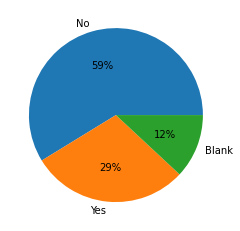

In [15]:
data = df_credit_product['count']
label = df_credit_product['Credit_Product']
plt.pie(data, labels=label, autopct='%.0f%%')
plt.show()

There is no one best way to visualize your data. Especially when you are trying to understand the data yourself. For example we can use a barchart to represent the same data and we see an interesting thing. That the immediate lowest value is half of the value next to it.

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

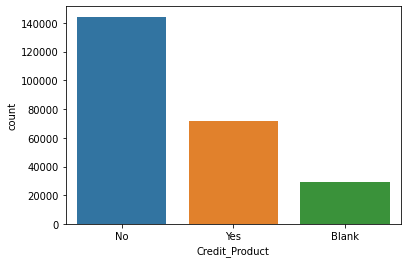

In [16]:
sns.barplot(x = 'Credit_Product', y = 'count', data=df_credit_product)

Does Yes and No occur frequently in the not a number category? so that maybe we can target and clean it as they add no value?
To answer that we will again use the *groupby()* method this time passing a list of the variables we want to group by. We will then visualize as previously so as to see and just have a feel of what the data is telling us before we do more mathematical analysis.

In [17]:
df_product_and_lead = df_train.groupby(['Credit_Product','Is_Lead'], dropna=False).size()
df_product_and_lead = df_product_and_lead.reset_index(name = 'count')
df_product_and_lead.fillna('Blank', inplace = True)
df_product_and_lead

,Credit_Product,Is_Lead,count
0,No,0,133734
1,No,1,10623
2,Yes,0,49353
3,Yes,1,22690
4,Blank,0,4350
5,Blank,1,24975


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

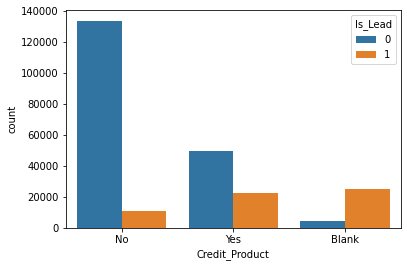

In [18]:
#x_plot_values = ('Credit_Product', 'Is_lead')
sns.barplot(x = 'Credit_Product', y = 'count', hue = 'Is_Lead', data=df_product_and_lead)

From eyeballing we can see that Blanks (NaN) tend to produce more leads in its category. It is a significant factor. That means that we cannot drop the blank values as they have a significance in determining leads. As an analyst one question going through you mind should be why is this the case. Let us analyse everything mathematically:

#### Credit_Product = Yes

Yes and is lead = 22,690,  Percentage of Yes options that are leads **31%**

Yes and is no lead = 49,353 Percentage of Yes Options that were not leads **69%**

Total Yes = 72,043, Percentage Of All options (that is Yes No and Null) **29%**

#### Credit_Product = No

No and is lead = 10,623, Percentage of No options that are leads **7%**

No and is no lead = 133,734 Percentage of No options that are not leads **93%**

Total No =  144,357 Percentage of all Options **59%**

#### Credit_Product = Null

Null and is Lead = 24,975 Percentage of null options that are leads **85%**

Null and is not lead = 4,350 Percentage of null options that are not leads **15%**

Total No = 29,325, Percentage of all Options **12%**

From here we can tell when Credit_Product is **No** has we get a significant amount of **No Leads** and very few **Leads**. When The credit_Product is **Null** we have a Higher number of **Leads**.Even though the percentage of nulls is 12% a very small number we can see it has a lot of impact on percentage significance.



## Let Us now See feature significance

Using Scikit learn try random forest to see what we can learn about features. Random forest is simple easy to implement and get important information especially on features and this is why I chose it. We start by importing the classes we need.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics


This is where we will understand the importance of knowing our data types. understanding our data types helps us understand how we will transform our data for our machine learning algorithm. Many Machine learning algorithms want data in numerical format. However how we convert that data to numerical format also matters.

First thing we need to do is drop the ID column as it adds no information to our data.

In [20]:
df_train.drop(['ID'], axis=1, inplace=True)
df_train.head(10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


Since we don't have ordinal data I will not show how to convert it in this tutorial. You can read more on the _apply()_ and the _replace()_ methods which are useful when transforming ordinal data into numerical format since the hierarchy matters. Let me also mention the _OneHotEncoder()_ from _sklearn.preprocessing_ which is powerful especially in data pipelines. In categorical mostly one will use the _pd.get_dummies()_ this method takes each of the unique value of the specified columns and creates a new column with a boolean indicating whether the value was there (1) or not (0). If that doesn't make sense you will see it in action below and it will become clear. One thing we should watch out for is the **Dummy variable trap**. This happens when we have variables that are so correlated one could easily predict the other and it ends up as noise in our model. Let us first examine the results of our dummy encoding. The _pd.set_option("display.max_columns", 100)_ Just says we want to see 100 columns you will see why that is important.

In [21]:

pd.set_option("display.max_columns", 100)
df_train_dummies = pd.get_dummies(df_train,  columns=['Gender','Region_Code', 'Occupation','Channel_Code', 'Credit_Product', 'Is_Active'], dummy_na=True)
df_train_dummies.head(10)


,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Gender_nan,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Region_Code_nan,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Occupation_nan,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Channel_Code_nan,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan,Is_Active_No,Is_Active_Yes,Is_Active_nan
0,73,43,1045696,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,30,32,581988,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,56,26,1484315,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,34,19,470454,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
4,30,33,886787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
5,56,32,544163,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
6,62,20,1056750,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
7,48,13,444724,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
8,40,38,1274284,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
9,55,49,2014239,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


Now you can easily sea what I said, The gender column for example had 2 Values (Male, Female) now each of those values has its own column with a boolean (1,0) indicating if it was true or not. When it comes to things like region code which was nominal data this is not a problem, However when it comes to boolean this is a big problem leading to what we called the **Dummy variable trap**. It is easy again to spot in our Gender variable. The 'Gender_Female' column is the exact opposite of the 'Gender_Male' column. This means they hold the exact same information to a machine learning algorithm and are just redundant. For this reason for all Binary we will drop one field. Another thing to not is that in our case we also had another category for NaN (blank values) created cause we wanted to treat 'Credit_Product' with null differently. We will need to drop it for all other categories before feeding our data.

In [22]:
df_train_dummies.drop(columns=['Gender_Male', 'Gender_nan', 'Region_Code_nan','Occupation_nan', 'Channel_Code_nan', 'Is_Active_No', 'Is_Active_nan'], axis=1, inplace=True)
df_train_dummies.head(10)

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan,Is_Active_Yes
0,73,43,1045696,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,30,32,581988,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,56,26,1484315,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3,34,19,470454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,30,33,886787,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
5,56,32,544163,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1
6,62,20,1056750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,48,13,444724,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
8,40,38,1274284,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0
9,55,49,2014239,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


We have now dealt with Nominal and Binary data but we are not yet done with our data transformation. We have the quantitative data which are integers in our case, but may also as well have included float. Machine learning algorithms work well with data that is in the same range. When we did our _df_train.describe()_ we got to see the Minimum and Maximum values. Our range can be defined as the numbers in between:

Age - Minimum was 23 And Maximum was 85 meaning the **Range =  59**

Vintage Minimum was 7 and Maximum was 135 meaning the **Range = 128** 

Avg_Account_Balance Minimum was 20,790  Maximum was 10,352,010 meaning the **Range = 10,331,220**

Looking at the range we notice that 'Age'has a very small range of 59, 'Vintage' has nearly double the 'Age' range. Account Balance however supercedes all ranges. This is normal since we are usually measuring things with different units of measurement. So how do we solve this problem? by normalization. Normalisation converts any range to values between 0 to 1 (If the attribute has negative values the range changes from -1 to 1). There is a tool from scikit-learn that can do our transformations for us called _MinMaxScaler()_ it basically does the math for us and our data frame. We need to initialize an object, fit our current dataset then transform. The data it returns is a numpy array which we again convert back to a dataframe





In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train_dummies)
scaled_series = scaler.transform(df_train_dummies)
#df_scaled = scaler.fit_transform(df_train_dummies[['Age', 'Vintage','Avg_Account_Balance']])
df_scaled = pd.DataFrame(scaled_series, columns=df_train_dummies.columns)
df_scaled.head(10)

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan,Is_Active_Yes
0,0.806452,0.281250,0.099205,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.112903,0.195312,0.054321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.532258,0.148438,0.141660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.177419,0.093750,0.043525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.112903,0.203125,0.083823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.532258,0.195312,0.050659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.629032,0.101562,0.100275,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
7,0.403226,0.046875,0.041034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,0.274194,0.242188,0.121331,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.516129,0.328125,0.192954,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Now our data is ready to be fed to the machine learning algorithm but we have problems. First of all we need to determine what values are being predicted that is our 'Is_Lead' column verses what values are being evaluated the rest of the columns. We define _y_ the variable being predicted as equal to the 'Is_lead' and _X_ the values being evaluated as everything else save for the 'Is_Lead' column.

Our second problem is, not only do we need to run our machine learning algorithm, we need to also determine how effective it is. If we feed all our data into the algorithm the learning algorithm will have already seen the data and we cannot predict whether it is making accurate prediciton for data it has never encountered. For this reason we will split our data into:

Training set - This will be used to train the algorithm
Testing set - This will be used to see how the algorithm is performing on data it has never encountered

scikit learn provides a method for splitting data into Training and testing set. The method is called _train_test_split()_ and for parameters it takes in the Values to be evaluated, the value we are predicting and the size to split. The _test_size=0.3_ means that we are taking 30% of the data for testing. The function randomizes what is to be taken.


In [24]:

y=df_scaled['Is_Lead']
X=df_scaled[df_scaled.columns.drop('Is_Lead')]
#X = insurance_df[insurance_df.columns.drop(y)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
X_train.head(10)

,Age,Vintage,Avg_Account_Balance,Gender_Female,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_nan,Is_Active_Yes
56876,0.080645,0.054688,0.260150,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
144951,0.580645,0.093750,0.088440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
30093,0.209677,0.328125,0.060310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
221726,0.258065,0.140625,0.090988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
208414,0.032258,0.093750,0.087430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200526,0.370968,0.578125,0.167132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
39980,0.080645,0.054688,0.083259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61286,0.661290,0.859375,0.082634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9565,0.387097,0.429688,0.042270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
80374,0.274194,0.148438,0.082053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
y_train.head(10)

56876     0.0
144951    1.0
30093     0.0
221726    0.0
208414    0.0
200526    1.0
39980     0.0
61286     0.0
9565      1.0
80374     0.0
Name: Is_Lead, dtype: float64

Creating our random forest classifier and testing the accuracy. The hyperparameters can be left as default. I decided to set the _min_sample_leaf_ parameter to 3. you can play around with this figures. In the real life you can use a Grid search to tune the hyperparameters for better results.

In [27]:
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, random_state=None)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8608345315933693


over 80 percent accuracy is not bad for a first start but would be terrible for any production environment. We need to see what features are important from what we have so far to guide us on which features are important. If less important features have too many blanks we will clear them out.

We need to create a rank of features from the random forest. We need to extract column names, extract the features using _feature_importances_ _ and sort it. Then now use the sorting array to ensure they are matched on to the other.

Text(0.5, 0, 'Random Forest Important Features')

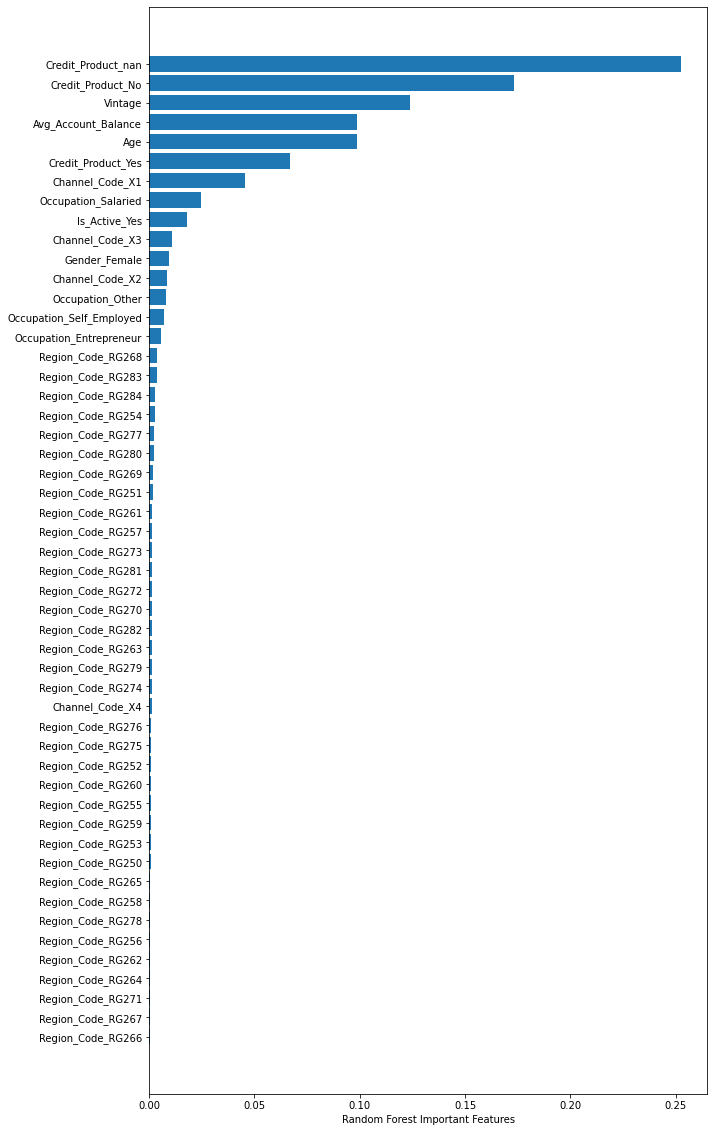

In [28]:
column_names = X_train.columns
sorted_indexes = clf.feature_importances_.argsort()
plt.figure(figsize=(10,20))
plt.barh(column_names[sorted_indexes], clf.feature_importances_[sorted_indexes])
plt.xlabel("Random Forest Important Features")

##clf.feature_importances_

From the above we can see our initial analysis was correct that _Credit_Product_nan_ was taken as the most important parameter. As an analyst the more reason you would want to find out why that field was left blank and if there was an option for another category to be present. The next parameter was _Credit_Product_No_ from there if you are keen you can see that we didn't even need the _Credit_Product_Yes_ field. That would be one of the columns to drop. We can also see that the _Region_Code_ field values add very little information. We would drop those fields before our next cycle of analysis. 

## Conclusion

In conclusion we have gone throught analysing and understanding our data and one cycle of machine learning. Why I say one cycle is that more often than not we have to go through various algorithms, tune parameters for our algorithm and drop some columns(features). This was a small dataset so random forest works well for feature identification. There are other methods like forward and backward feature selection. It takes a lot of patience, thinking and a dash of luck to get a really good combination.